In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import scipy

In [5]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
%matplotlib inline

In [6]:
house = pd.read_csv('train.csv', index_col='Id')
house_test = pd.read_csv('test.csv', index_col='Id')

house.SalePrice = house.SalePrice.apply(np.log)
print(house.shape)
print(house_test.shape)

(1460, 80)
(1459, 79)


In [7]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


In [8]:
house.SalePrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Skew is: 0.12133506220520406


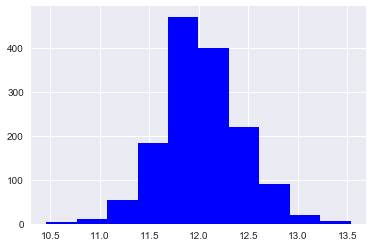

In [11]:
print ("Skew is:", house.SalePrice.skew())
plt.hist(house.SalePrice, color='blue')
plt.show()

Skew is -0.02037671523503421


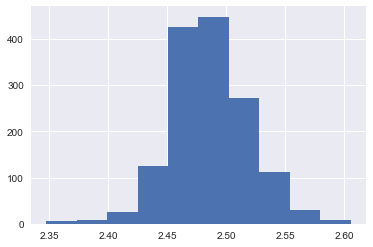

In [12]:
#Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data.
target = np.log(house.SalePrice)
print("Skew is", target.skew())
plt.hist(target)
plt.show()
# A value closer to 0 means that we have improved the skewness of the data.

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

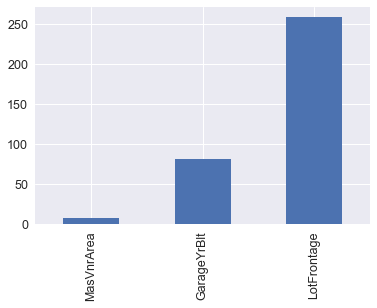

In [211]:

missing = house.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

# Numerical Data

In [203]:
quantitative = [f for f in house.columns if house.dtypes[f] != 'object']
qualitative = [f for f in house.columns if house.dtypes[f] == 'object']

In [ ]:
quantitative

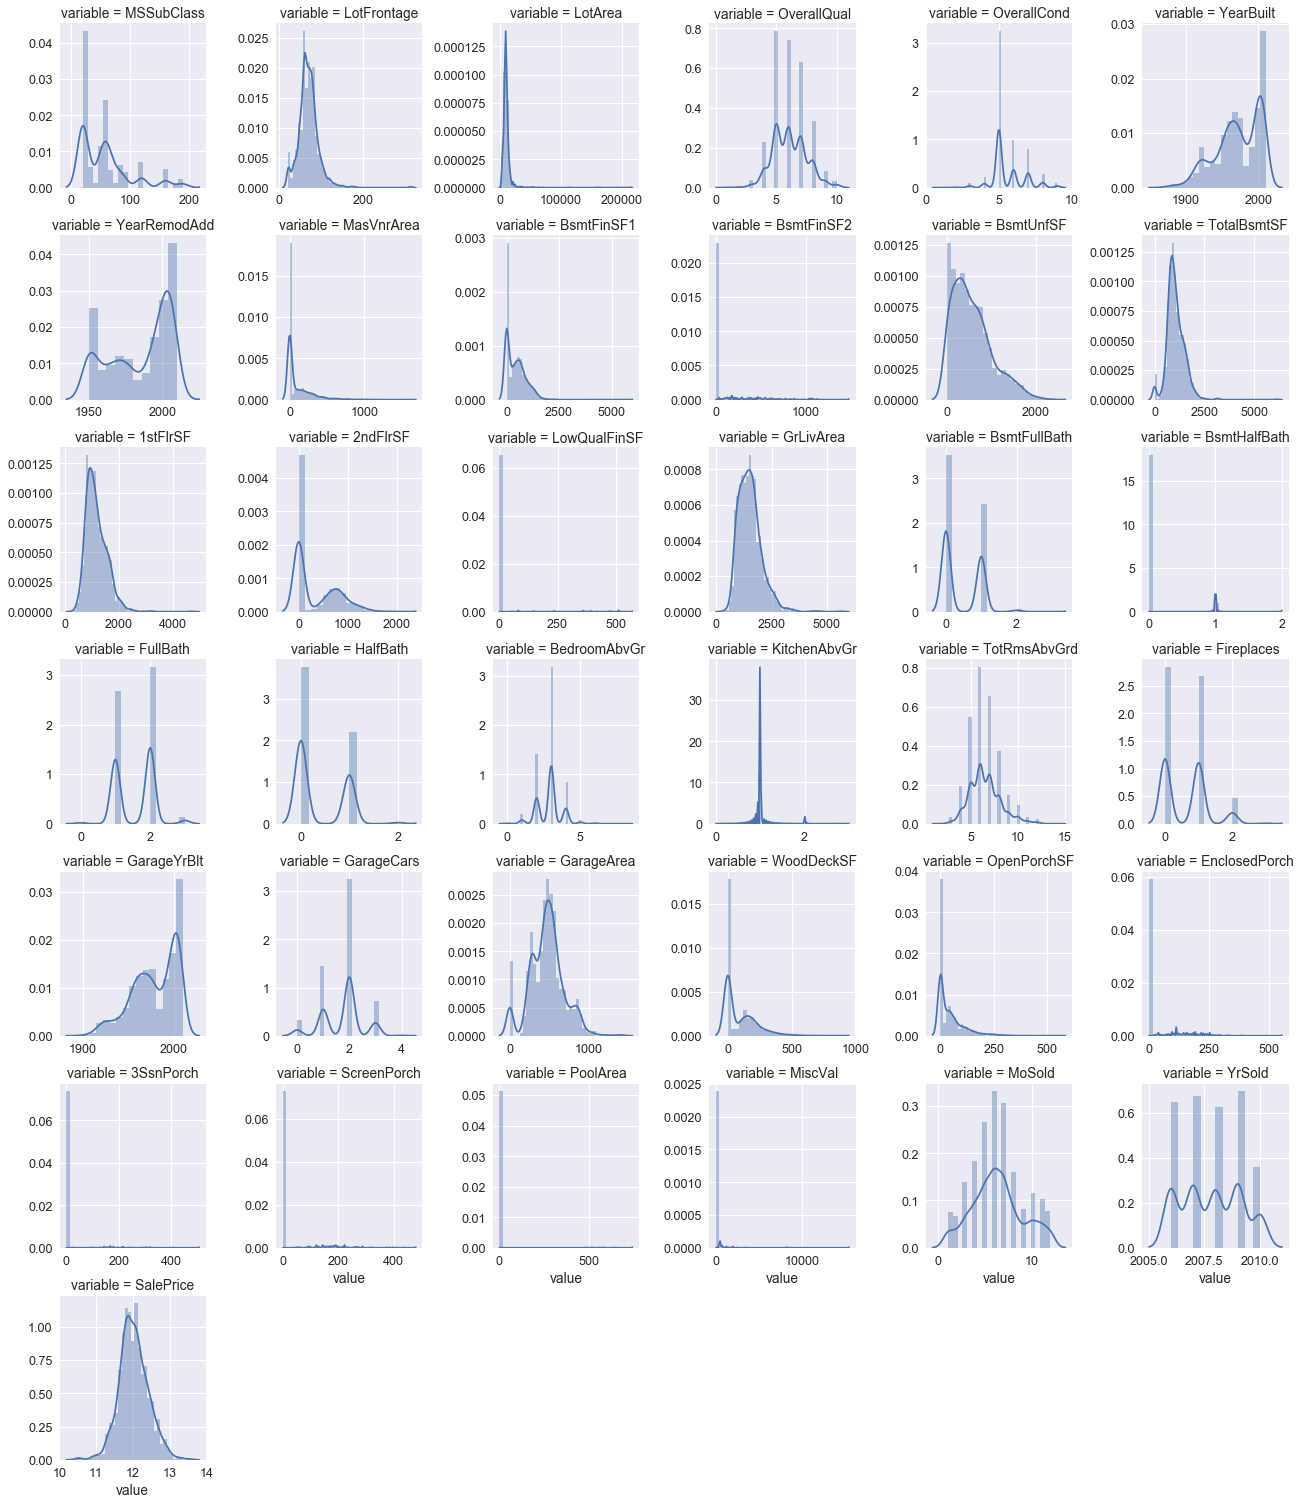

In [205]:
f = pd.melt(house, value_vars=quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


In [153]:
quantitative2 = house.select_dtypes(include = ['float64', 'int64'])
quantitative2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


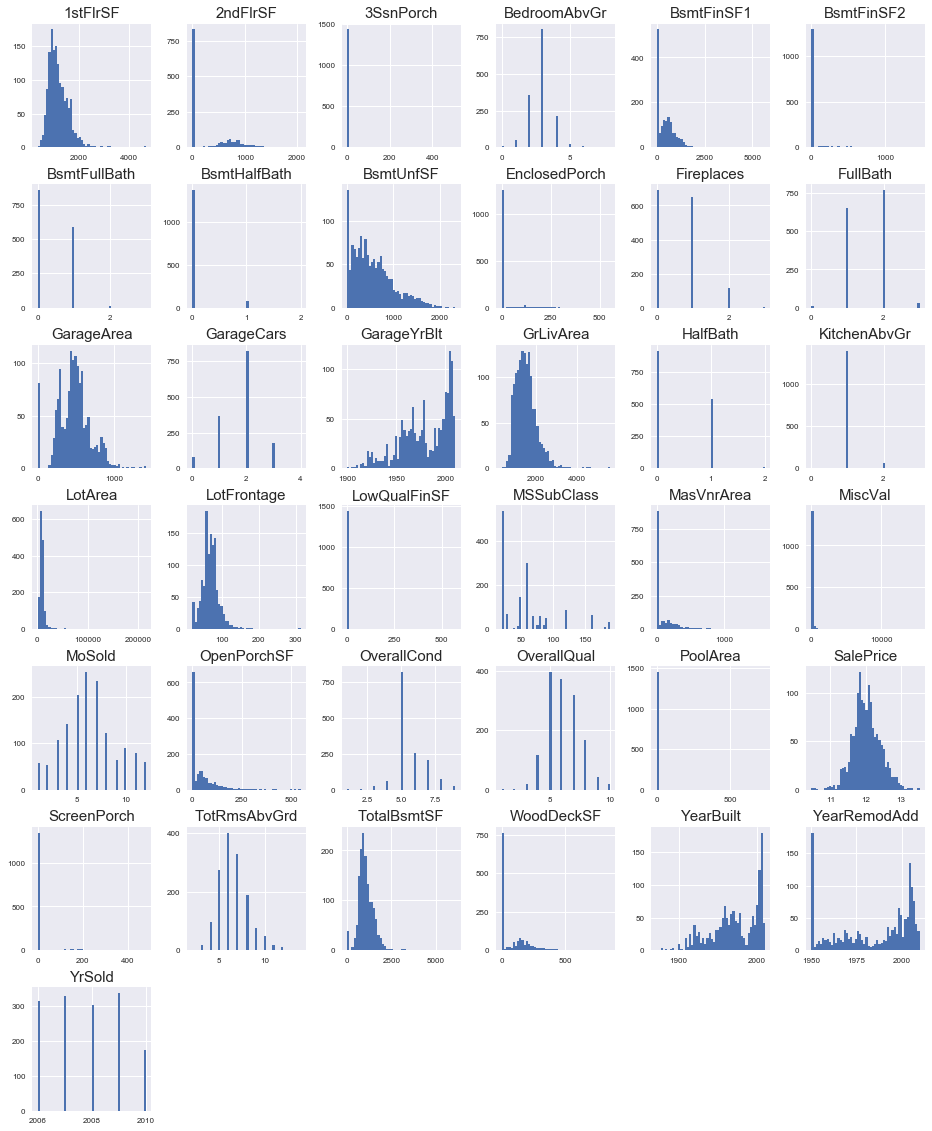

In [146]:
quantitative2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seems to share a similar distribution to the one we have with `SalePrice`. Lets see if we can find new clues later.

In [195]:
features = quantitative

standard = house[house['SalePrice'] < 12]
pricey = house[house['SalePrice'] >= 12]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

ValueError: fill value must be in categories

# Categorical Data

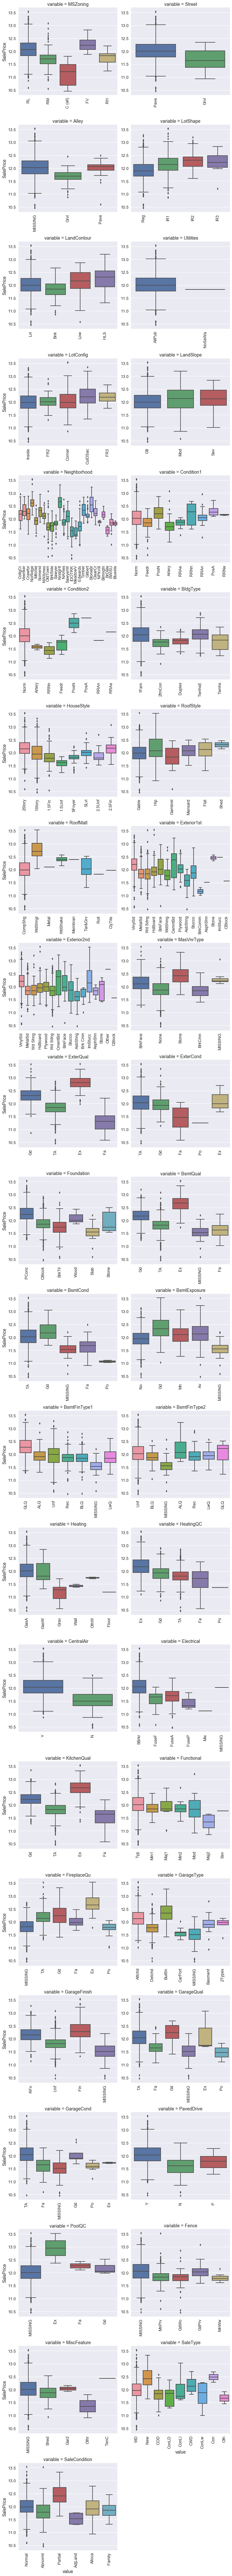

In [206]:
for c in qualitative:
    house[c] = house[c].astype('category')
    if house[c].isnull().any():
        house[c] = house[c].cat.add_categories(['MISSING'])
        house[c] = house[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(house, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

'Neighborhood' feature has the leargest impact on SalesPrice having many different obs in a wide range of Sales price.

# Categorical Data

In [193]:
categorical_features = [a for a in quantitative[:-1] + house.columns.tolist() if (a not in quantitative[:-1]) or (a not in house.columns.tolist())]
df_categ = house[categorical_features]
df_categ.head()
#df_not_num = df_categ.select_dtypes(include = ['O'])
#print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

,SalePrice
Id,
1,12.247694
2,12.109011
3,12.317167
4,11.849398
5,12.429216


In [190]:
df_not_num = df_categ.select_dtypes(include = ['O'])

In [141]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

IndexError: index out of range

# Correlations

In [67]:
corr = house.corr()
corr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Garage-Built
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.009123,0.168400,0.118979,0.297317,-0.022860,0.192190,0.208638,0.178433,0.255299,0.226118,0.138723,0.017259,0.094260,0.245444,0.174398,0.240775,0.154029,0.017697,0.306613,0.085192,0.017248,0.242890,0.132021,0.114983,-0.008873,0.250646,0.244393,0.202332,0.217242,0.227052,0.259267,0.255503,0.137740,0.149001,-0.031267,0.036479,0.057283,0.068414,0.018301,0.038288,0.009665,0.335317,-0.026251
std,0.194184,0.206585,0.176164,0.295276,0.189601,0.311622,0.256991,0.207309,0.287729,0.271148,0.242616,0.167419,0.231309,0.275331,0.232238,0.264244,0.241188,0.167131,0.254620,0.217077,0.159900,0.250152,0.206132,0.215276,0.196953,0.271290,0.239233,0.222600,0.236059,0.264870,0.274222,0.263515,0.176697,0.177839,0.188645,0.153128,0.157198,0.155644,0.155496,0.154708,0.158463,0.302767,0.202709
min,-0.386347,-0.386347,-0.139781,-0.183882,-0.375983,-0.493082,-0.193919,-0.148090,-0.168319,-0.277731,-0.495251,-0.209294,-0.495251,-0.238518,-0.171416,-0.251758,-0.202646,-0.183784,-0.079686,-0.422900,-0.147871,-0.194149,-0.119916,-0.150673,-0.277731,-0.172423,-0.057583,-0.123936,-0.154811,-0.193962,-0.185758,-0.151521,-0.125989,-0.093079,-0.387268,-0.043825,-0.082864,-0.059689,-0.054095,-0.145721,-0.145721,-0.170481,-0.493082
25%,-0.044697,0.045641,0.014008,0.048757,-0.110017,-0.004334,0.017639,0.020866,0.014433,0.011880,-0.006078,-0.047099,-0.008948,0.006441,-0.016781,0.043738,0.022569,-0.042553,0.087458,-0.036204,-0.025721,0.042478,-0.011304,-0.016870,-0.107033,0.012189,0.044878,0.046639,0.042265,0.000392,0.028349,0.043249,0.021641,0.038456,-0.112070,-0.006263,0.011691,0.010003,-0.022071,-0.005779,-0.031719,0.056115,-0.122162
50%,-0.012383,0.151972,0.077672,0.295493,-0.036868,0.187599,0.179618,0.174561,0.207932,0.229635,0.128451,-0.012796,0.114009,0.285573,0.130860,0.244671,0.092165,-0.014241,0.287389,0.077653,-0.008555,0.259977,0.116237,0.050450,-0.040751,0.221091,0.234192,0.194561,0.202184,0.241030,0.224054,0.241435,0.159718,0.151972,-0.042697,0.020643,0.041074,0.049604,-0.006495,0.021490,-0.013618,0.334135,-0.022275
75%,0.030239,0.257408,0.176050,0.550642,0.025499,0.458563,0.396111,0.283373,0.489864,0.401639,0.244585,0.040969,0.212200,0.423995,0.310405,0.408702,0.200845,0.027483,0.464463,0.158416,0.027824,0.414483,0.211413,0.123545,0.034500,0.454609,0.347755,0.270253,0.350711,0.401239,0.444256,0.437553,0.222879,0.230245,0.009907,0.035233,0.063453,0.072040,0.006353,0.041656,0.008410,0.595876,0.011795
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


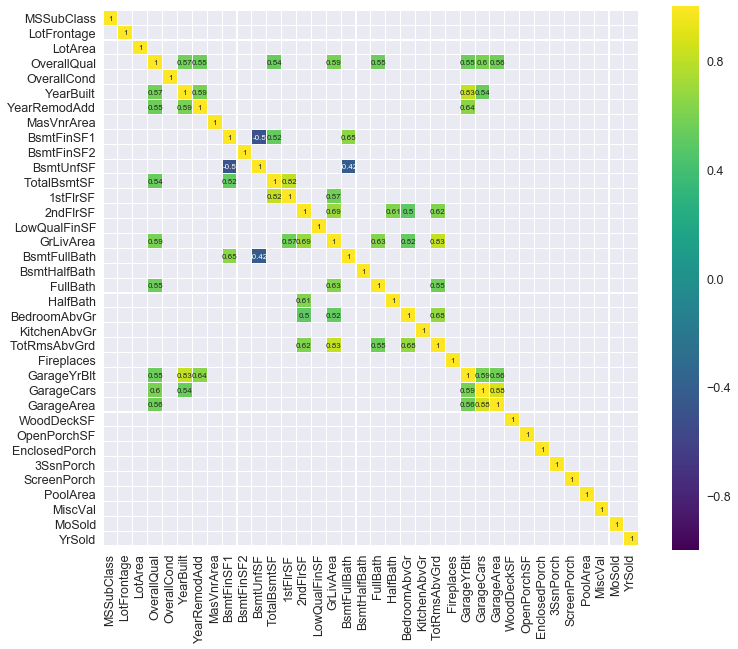

In [122]:
corr = quantitative2.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [123]:
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corr, vmax=.8, square=True);

High Correlations:
1. TotalBsmtSF & 1stFlrSF
2. TotalBsmtSF & GarageCars

'SalePrice' correlation matrix (zoomed heatmap style)

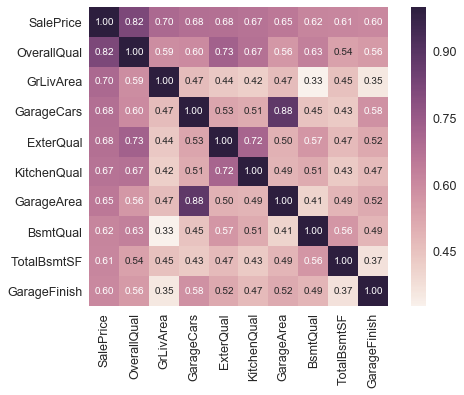

In [69]:
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual and GrLivArea are very closely related to SalesPrice

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

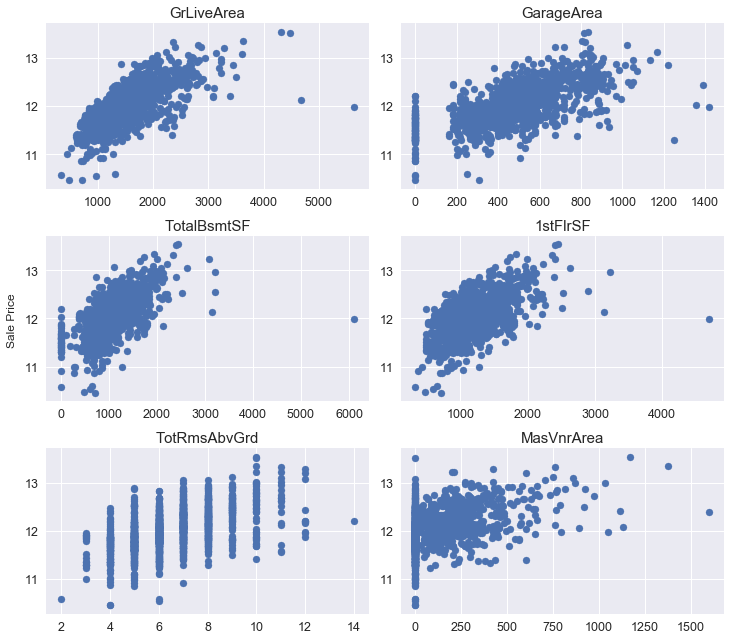

In [218]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = house.SalePrice.values
axarr[0, 0].scatter(house.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(house.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(house.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(house['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(house.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(house.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [89]:
ord_cols = ['ExterQual', 'ExterCond','BsmtCond','HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ord_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

In [90]:
ord_df = house.copy()

for col in ord_cols:
    ord_df[col] = ord_df[col].map(lambda x: ord_dic.get(x, 0))
ord_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Garage-Built
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,0,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,0,8,Typ,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,MISSING,MISSING,0,2,2008,WD,Normal,12.247694,0.0
2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,0,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,0,6,Typ,1,0,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,MISSING,MISSING,0,5,2007,WD,Normal,12.109011,0.0
3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,0,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,0,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,0,6,Typ,1,0,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,MISSING,MISSING,0,9,2008,WD,Normal,12.317167,0.0
4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,0,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,0,7,Typ,1,0,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,MISSING,MISSING,0,2,2006,WD,Abnorml,11.849398,83.0
5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,0,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,0,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,0,9,Typ,1,0,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,MISSING,MISSING,0,12,2008,WD,Normal,12.429216,0.0


In [103]:
import operator

individual_features_df = []
for i in range(0, len(house.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = house[[house.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[house.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

KeyError: 0

In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [14]:
# distinguish the NA and missing in train data
miss = list(house.columns[house.isnull().sum(axis = 0) >= 1])
miss.remove('LotFrontage')
miss.remove('MasVnrArea')
miss.remove('GarageYrBlt')
miss.remove('MasVnrType')

for i in range(len(miss)):
    house[miss[i]][house[miss[i]].isnull() == True] = 'NA'
house['MasVnrType'][house['MasVnrType'].isnull() == True] = 'CBlock'

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
with open('data_description.txt', 'r') as file:
    lines_level = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'data_description.txt'

In [40]:
feature = ''
levels = {}
level = ''

for line in lines_level:
    if (not not re.findall(': ', line)) and (not re.findall('story:', line)):
#         features.append(re.split(':', line)[0])
        feature = re.split(':', line)[0]
        levels[feature] = []
    else:
        if line != '\n':
#             levels.append(re.split('\t', line)[0].strip())
            level = re.split('\t', line)[0].strip()
            if level != '': levels[feature].append(level)
levels['Id'] = []
levels['SalePrice'] = []
# print(levels)

NameError: name 'lines_level' is not defined

In [41]:
# find ordinal and none ordinal
with open('DataDocumentation.txt', 'r',encoding='cp1252') as file:
    lines = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'DataDocumentation.txt'

In [42]:
nom_lines = []
ord_lines = []
for line in lines:
    if re.findall('(Nominal)', line):
        nom_lines.append(re.sub(' ', '', re.split('\(Nominal\)', line)[0].strip()))
    elif re.findall('(Ordinal)', line):
        ord_lines.append(re.sub(' ', '', re.split('\(Ordinal\)', line)[0].strip()))
print(nom_lines)
print(ord_lines)

NameError: name 'lines' is not defined

In [97]:
def my_cat(col, levels, ord_lines):
    if not not levels[col.name]: 
        if col.name in ord_lines:
            temp = pd.Categorical(list(col.astype('str')), ordered=True, categories=levels[col.name][::-1])
            temp.name = col.name
            return temp
        else:
            temp = pd.Categorical(list(col.astype('str')), categories=levels[col.name][::-1])
            temp.name = col.name
            return temp
   
    else:
        return col

In [98]:
for col in house:
    house[col] = my_cat(house[col], levels, ord_lines)

KeyError: 'MSSubClass'

In [45]:
miss = list(house_test.columns[house_test.isnull().sum(axis = 0) >= 1])
miss.remove('LotFrontage')
miss.remove('MasVnrArea')
miss.remove('GarageYrBlt')
miss.remove('Utilities')
miss.remove('Exterior1st')
miss.remove('Exterior2nd')
miss.remove('TotalBsmtSF')
miss.remove('BsmtHalfBath')
miss.remove('BsmtFullBath')
miss.remove('KitchenQual')
miss.remove('Functional')
miss.remove('GarageCars')
miss.remove('GarageArea')
miss.remove('SaleType')
miss.remove('BsmtFinSF1')
miss.remove('BsmtFinSF2')
miss.remove('BsmtUnfSF')

for i in range(len(miss)):
    house_test[miss[i]][house_test[miss[i]].isnull() == True] = 'NA'

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
for col in house_test:
    house_test[col] = my_cat(house_test[col], levels, ord_lines)

KeyError: 'MSSubClass'

In [ ]:
print(levels['OverallQual'][::-1])
print(levels['ExterQual'][::-1])
print(levels['BsmtQual'][::-1])
print(levels['KitchenQual'][::-1])
print(levels['GarageFinish'][::-1])
print(levels['FireplaceQu'][::-1])
print(levels['HeatingQC'][::-1])

In [47]:
house['ExterQual'] = house['ExterQual'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
house['BsmtQual'] = house['BsmtQual'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
house['KitchenQual'] = house['KitchenQual'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
house['GarageFinish'] = house['GarageFinish'].map(lambda x: {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}.get(x, 0))
house['FireplaceQu'] = house['FireplaceQu'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
house['HeatingQC'] = house['HeatingQC'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))

In [48]:
house['OverallQual'] = pd.to_numeric(house['OverallQual'])
house['ExterQual'] = pd.to_numeric(house['ExterQual'])
house['BsmtQual'] = pd.to_numeric(house['BsmtQual'])
house['KitchenQual'] = pd.to_numeric(house['KitchenQual'])
house['GarageFinish'] = pd.to_numeric(house['GarageFinish'])
house['FireplaceQu'] = pd.to_numeric(house['FireplaceQu'])
house['HeatingQC'] = pd.to_numeric(house['HeatingQC'])

In [49]:
# house.info()

In [50]:
numeric_cols = house.describe().transpose().index
print(numeric_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [51]:
def year_eng(data, year_1, year_2, year_out):
    data[year_out] = data[year_1] - data[year_2]
    data[year_out][data[year_out].isnull()] = 0
year_eng(house, 'GarageYrBlt', 'YearBuilt', 'Garage-Built')
house.drop(['GarageYrBlt'], axis = 1, inplace = True)

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
from fancyimpute import KNN
house[numeric_cols] = KNN(k = int(math.sqrt(house.shape[0]))).complete(house[numeric_cols])

ModuleNotFoundError: No module named 'fancyimpute'

In [29]:
house.to_csv('house_clean.csv')